# INNE - Isolation-based anomaly detection using nearest-neighbor ensembles.
### The INNE algorithm uses the nearest neighbour ensemble to isolate anomalies. It partitions the data space into regions using a subsample and determines an isolation score for each region. As each region adapts to local distribution, the calculated isolation score is a local measure that is relative to the local neighbourhood, enabling it to detect both global and local anomalies. INNE has linear time complexity to efficiently handle large and high-dimensional datasets with complex distributions.
Source: https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.inne

### Arguments that work with INNE algorithm:
1. n_estimators
2. max_samples
3. contamination
4. random_state

In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
import sys
import time
sys.path.insert(0,'../../../..')
import omama as O

Populating the interactive namespace from numpy and matplotlib


In [3]:
imgs = O.DataHelper.get2D(N = 100, config_num=5, randomize=True, timing=True)
downsampled_imgs = O.Normalize.downsample(imgs, output_shape=(64, 64), flatten=True, timing=True)

get2D                    ...took   216.736771 seconds
image downsampling       ...took     4.406275 seconds
image downsampling       ...took     6.422997 seconds
image downsampling       ...took     8.422907 seconds
image downsampling       ...took    10.404381 seconds
image downsampling       ...took    12.408878 seconds
image downsampling       ...took    14.492492 seconds
image downsampling       ...took    18.759086 seconds
image downsampling       ...took    21.652263 seconds
image downsampling       ...took    24.535654 seconds
image downsampling       ...took    25.716330 seconds
image downsampling       ...took    26.777346 seconds
image downsampling       ...took    27.249517 seconds
image downsampling       ...took    27.721694 seconds
image downsampling       ...took    28.193327 seconds
image downsampling       ...took    28.665594 seconds
image downsampling       ...took    29.722839 seconds
image downsampling       ...took    30.786685 seconds
image downsampling       ...

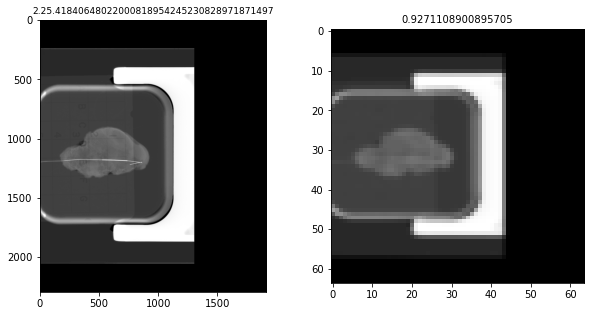

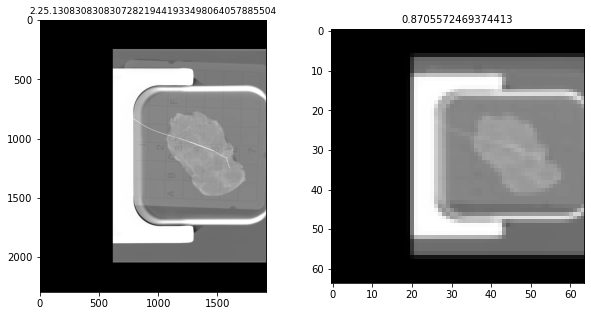

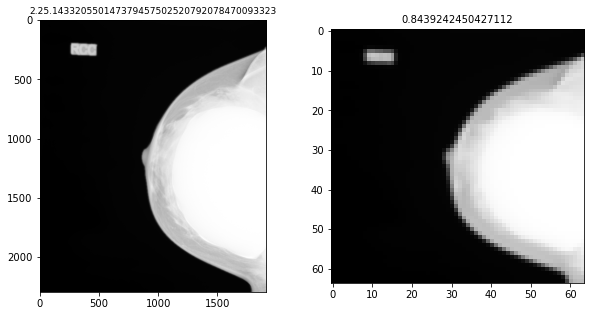

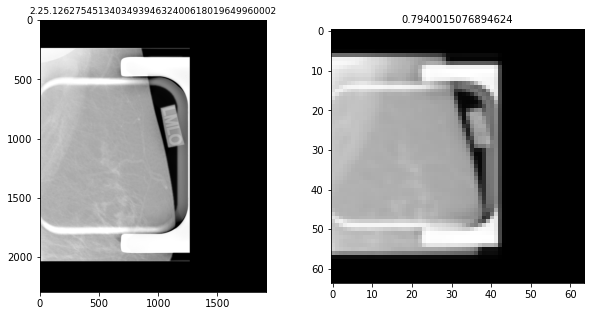

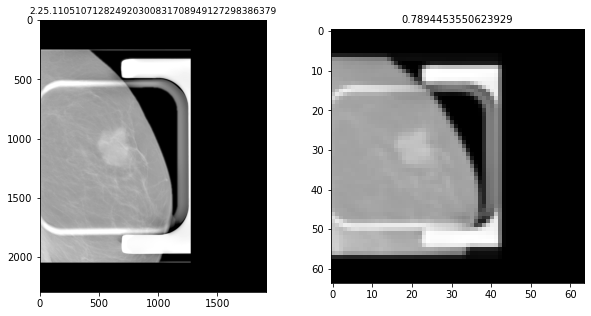

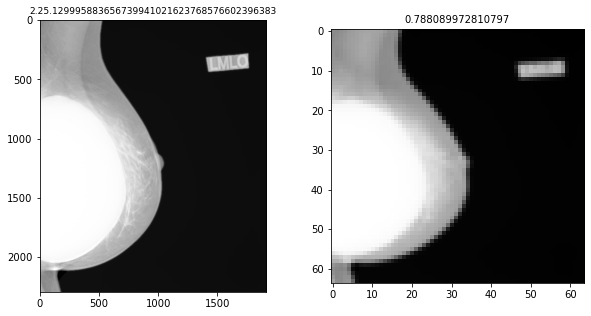

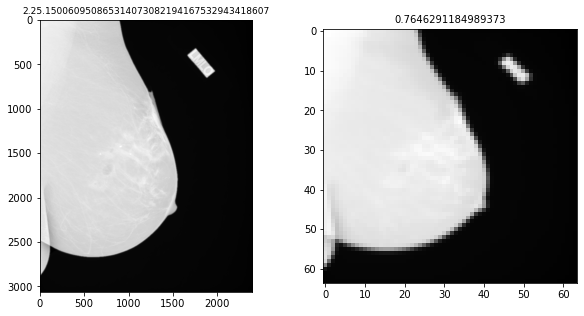

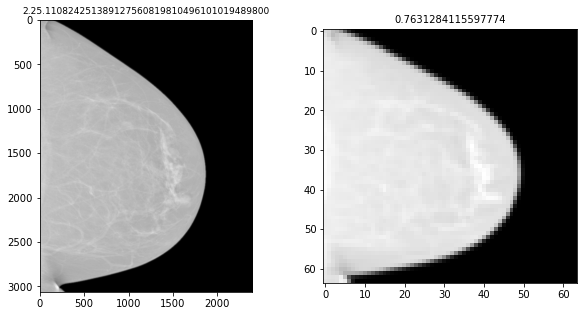

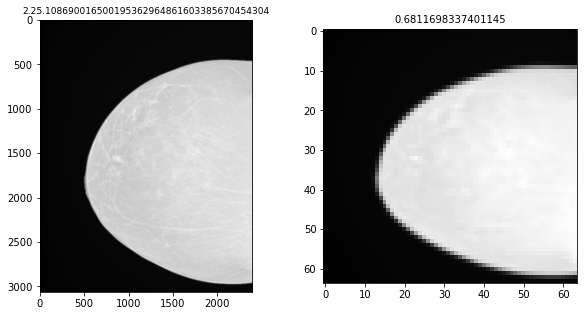

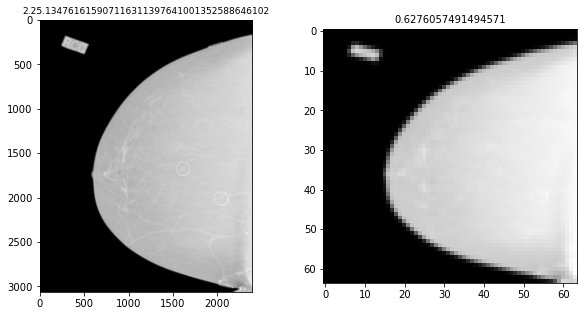

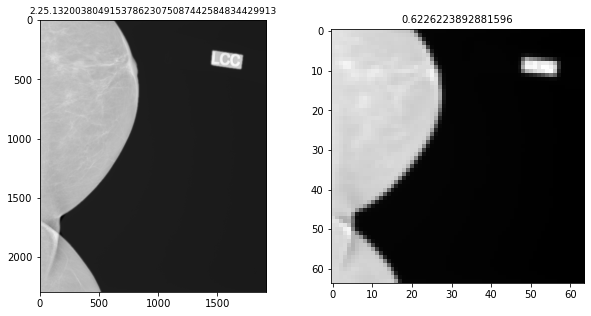

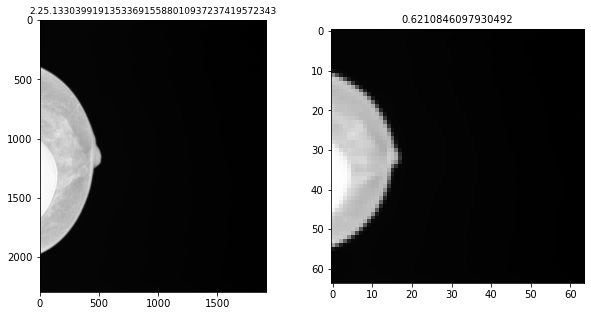

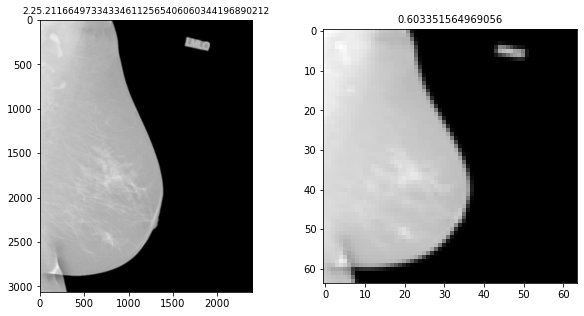

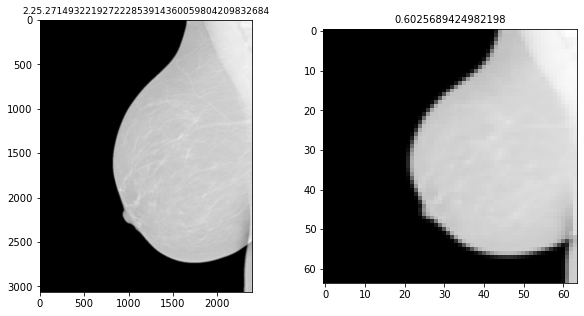

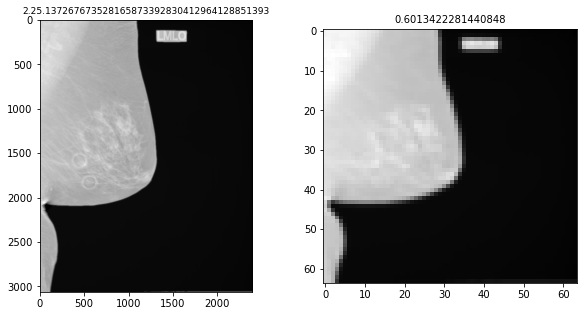

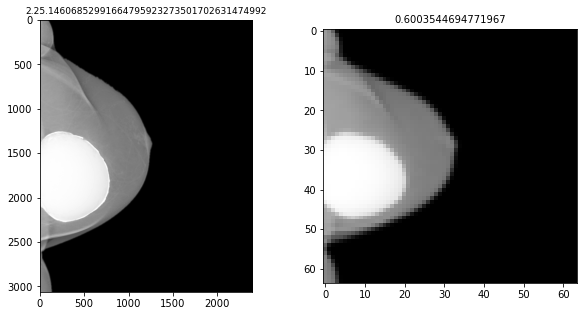

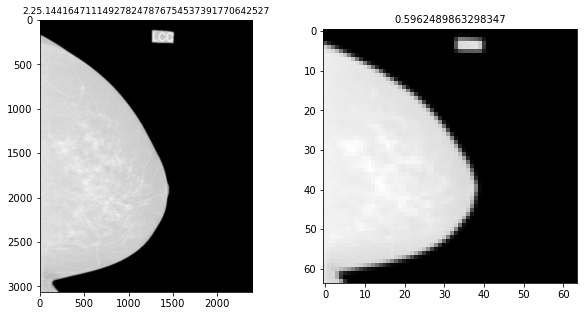

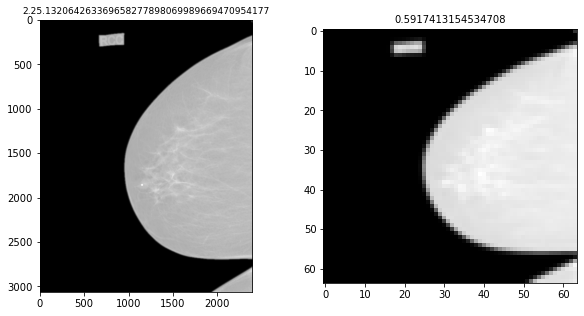

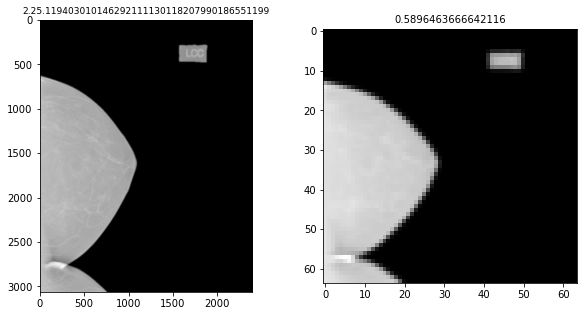

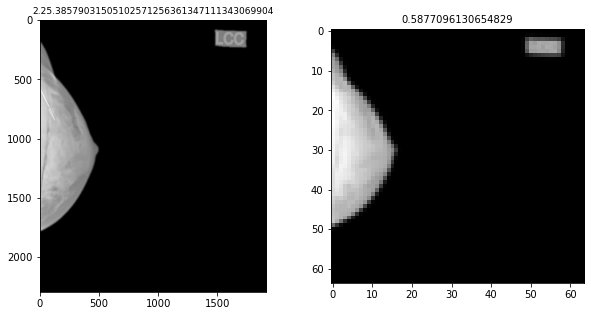

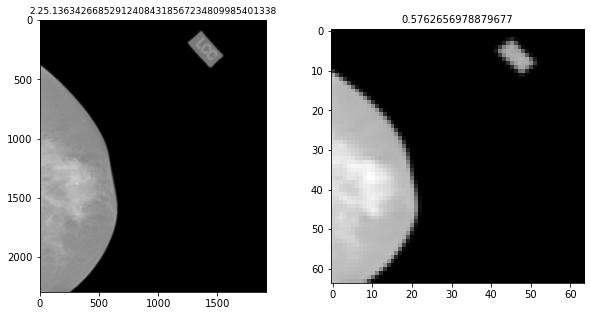

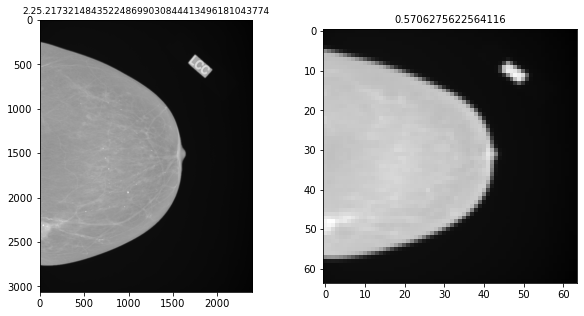

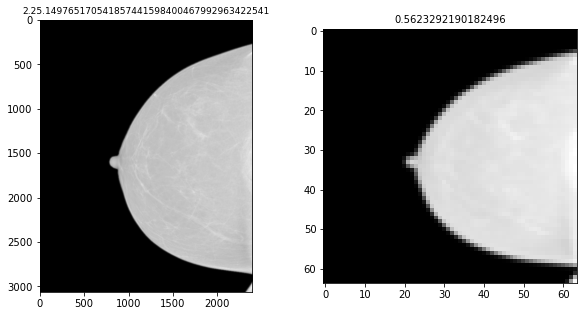

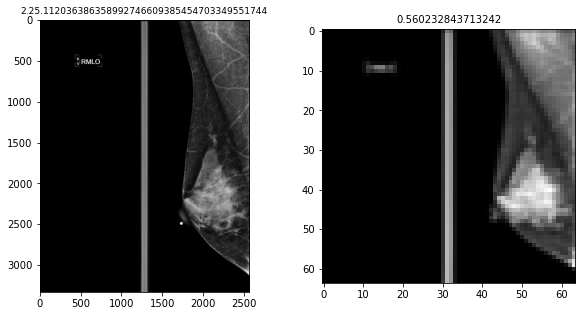

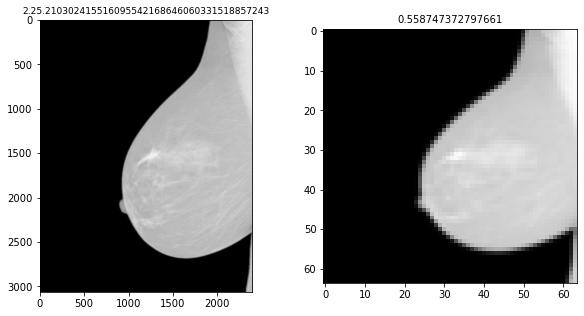

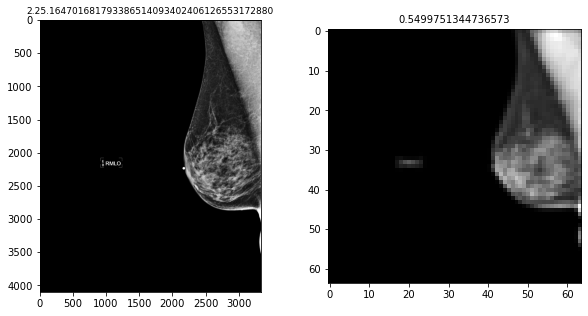

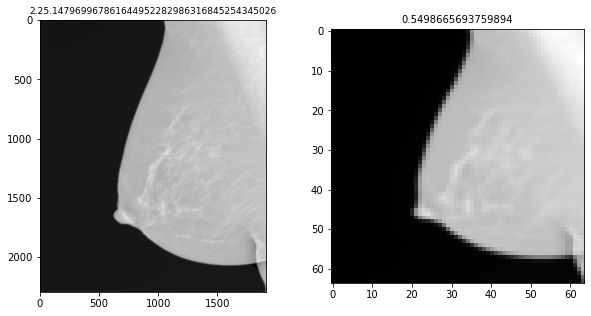

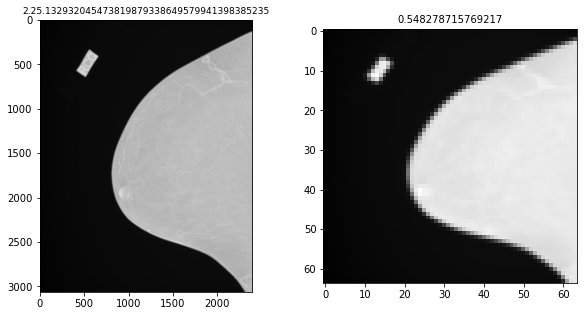

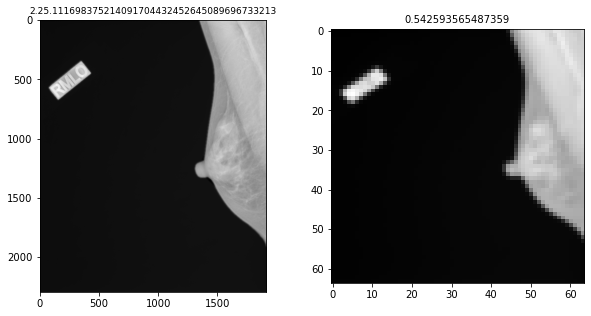

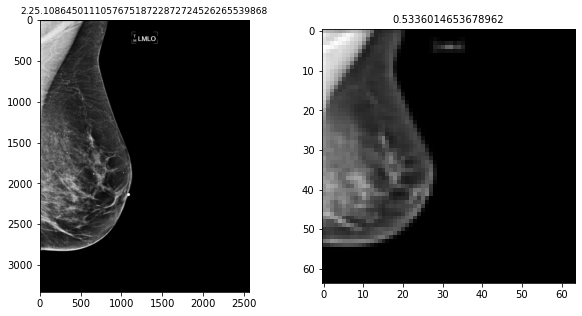

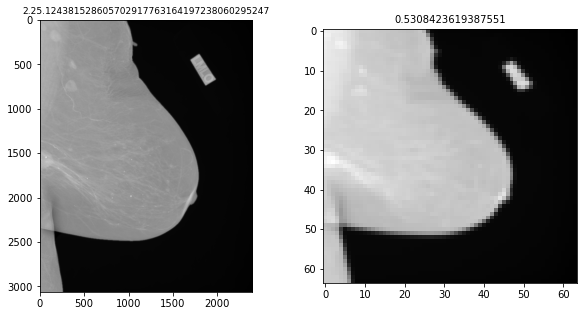

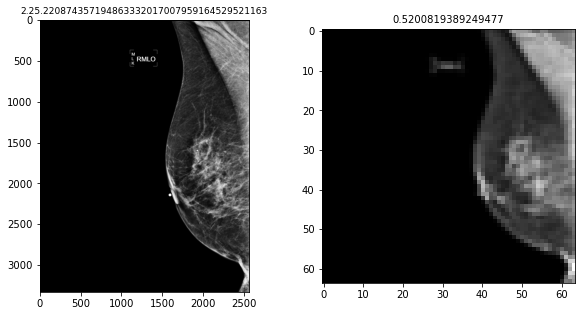

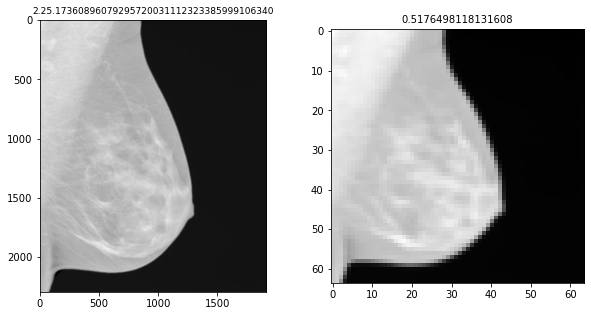

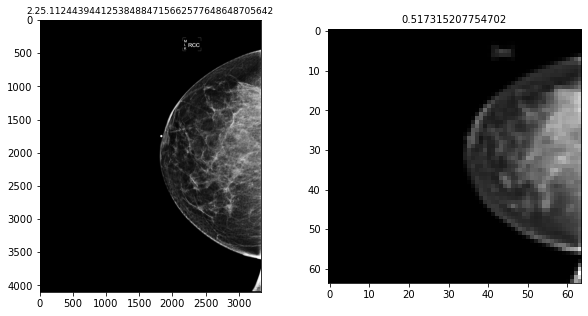

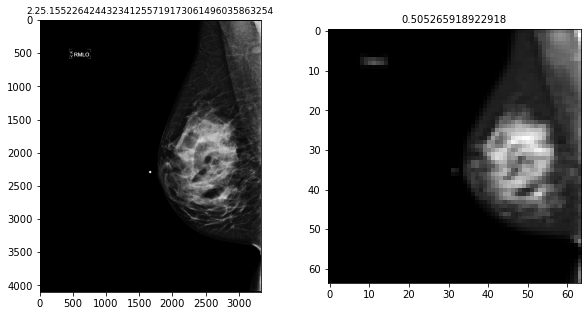

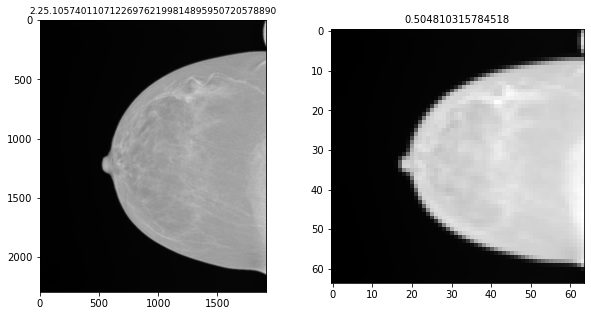

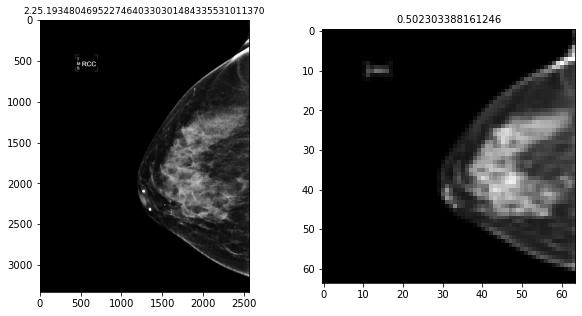

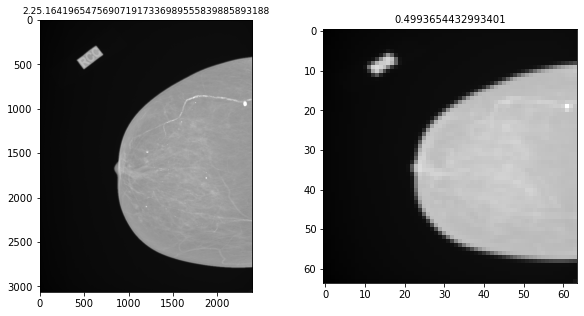

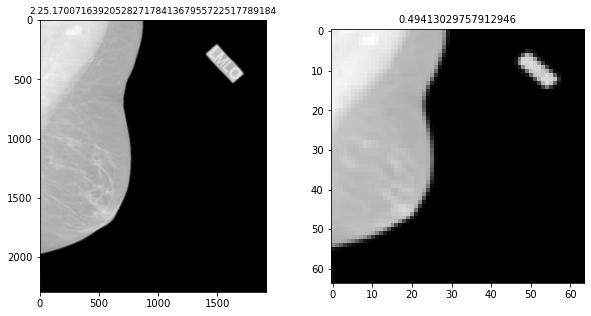

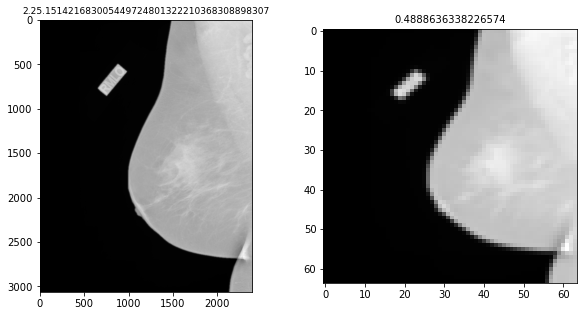

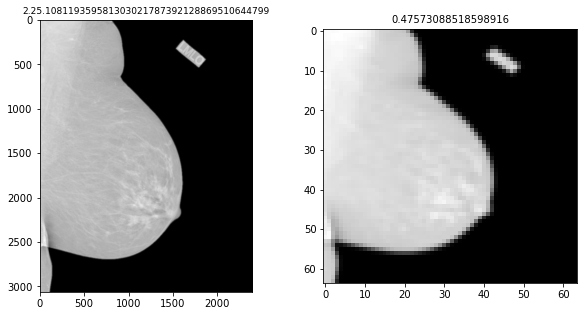

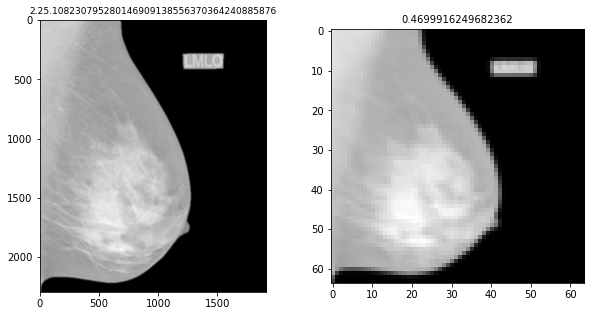

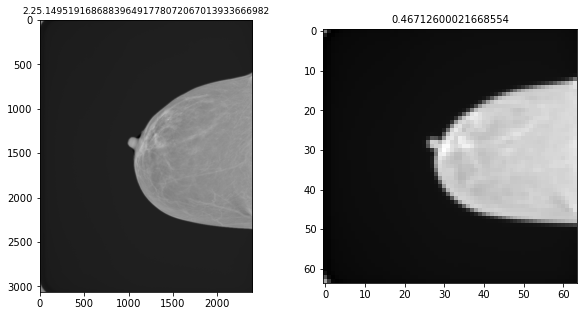

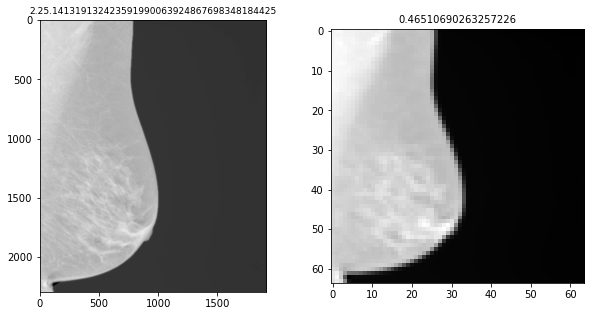

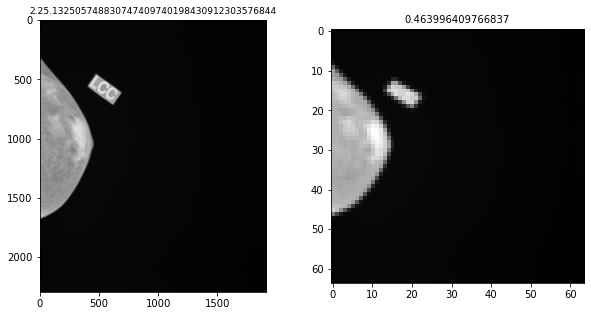

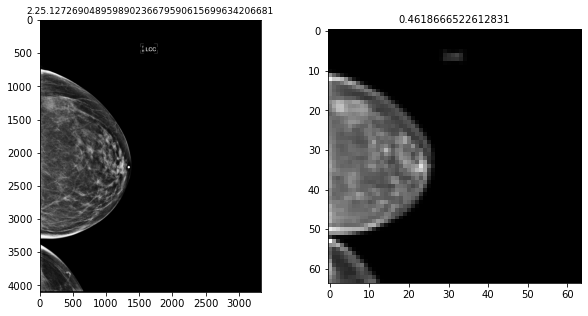

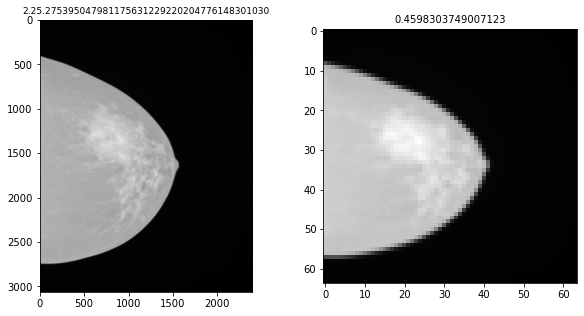

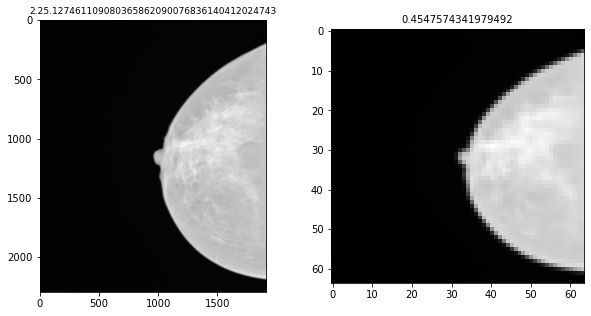

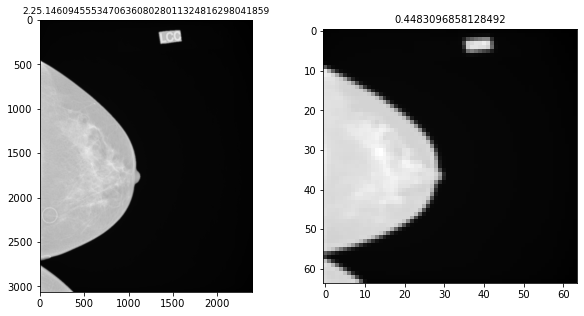

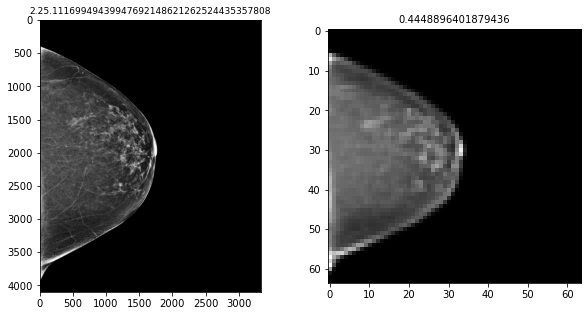

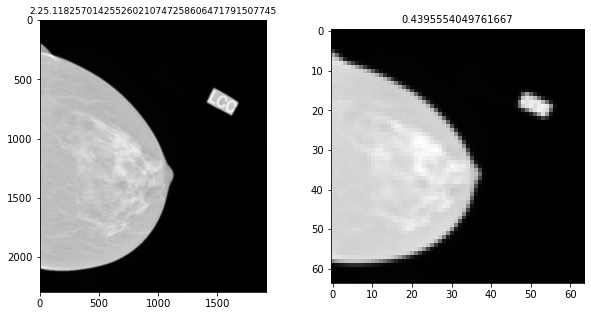

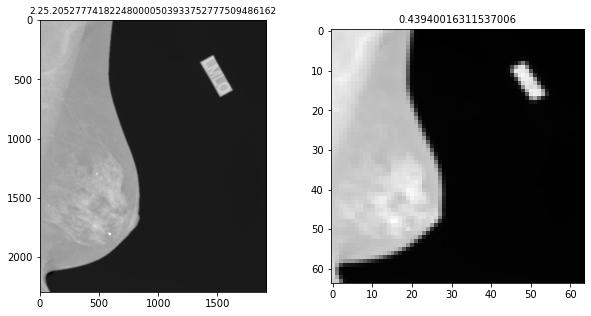

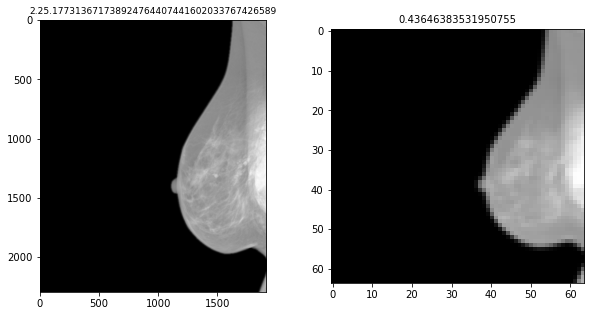

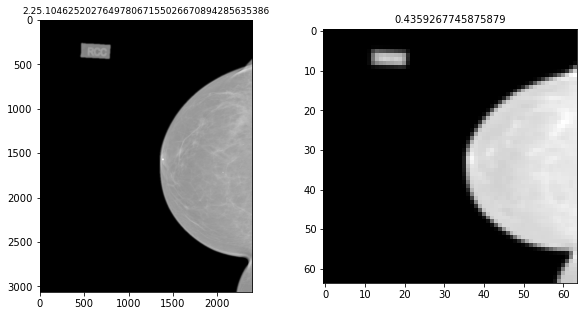

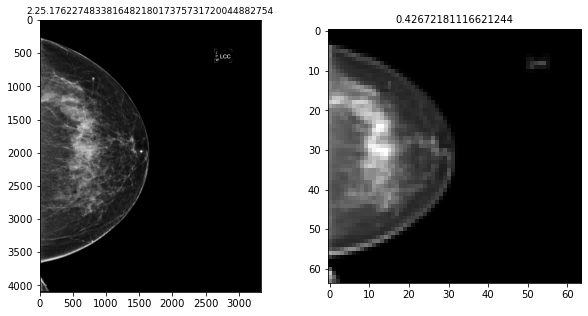

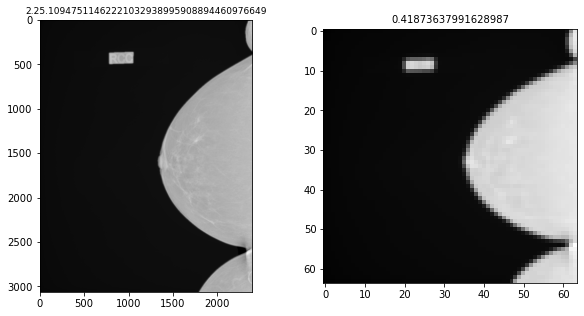

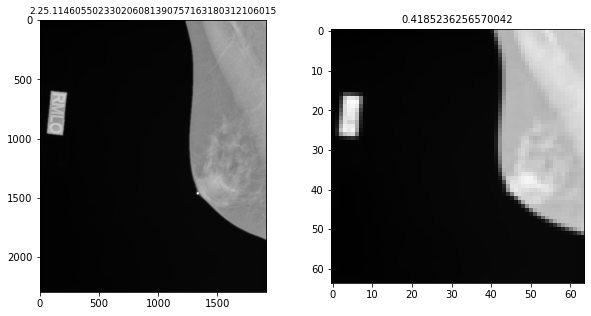

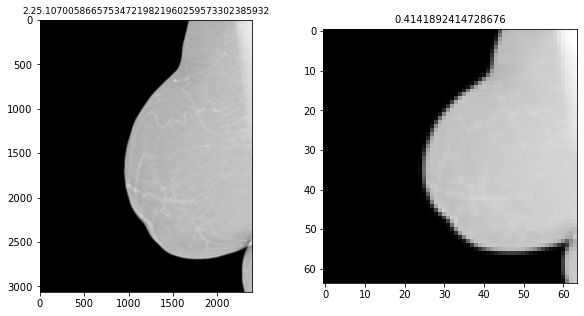

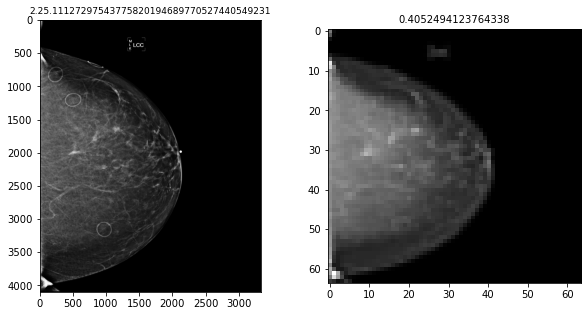

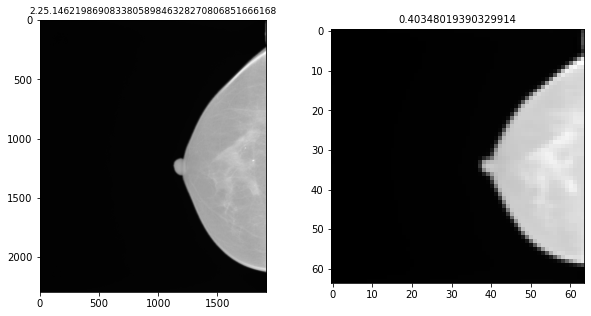

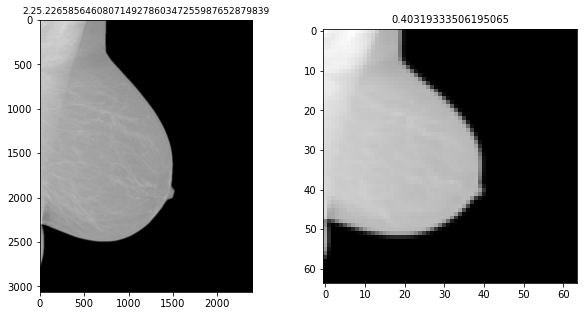

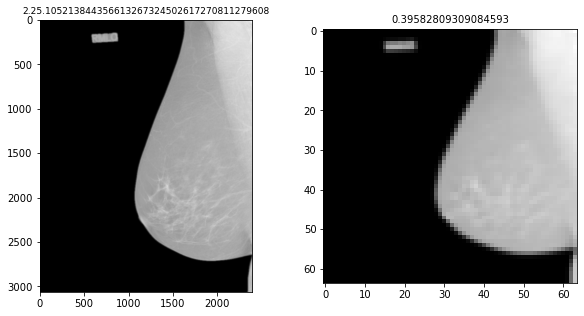

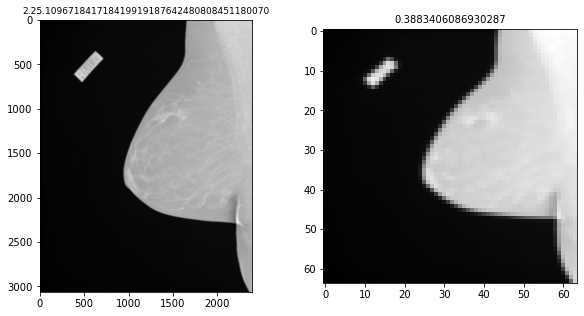

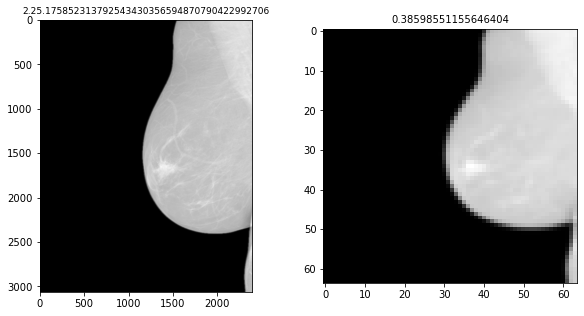

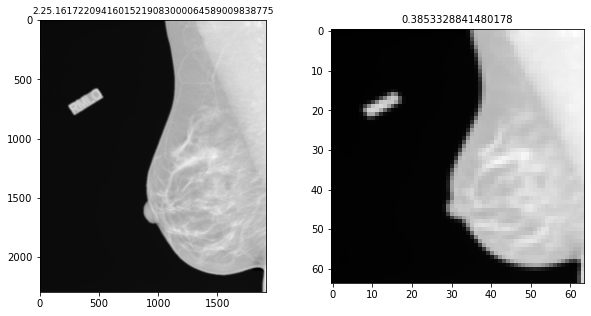

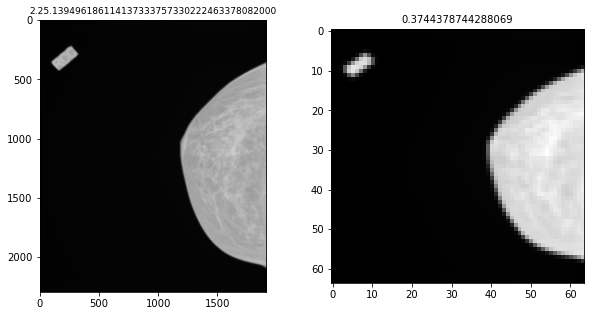

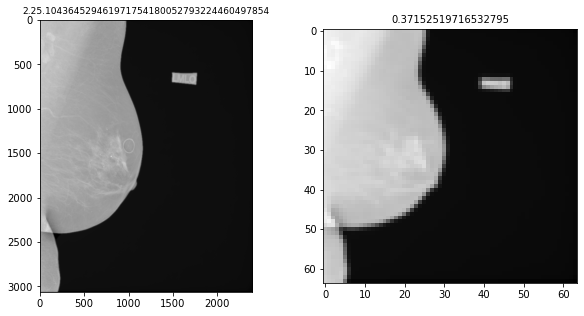

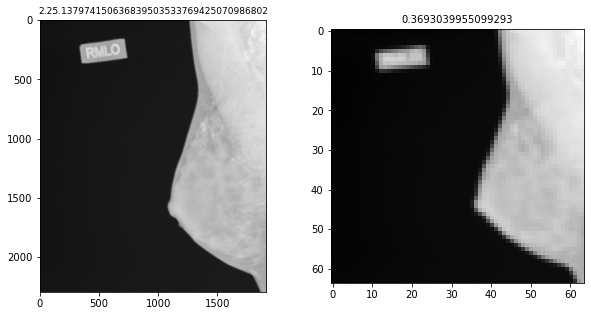

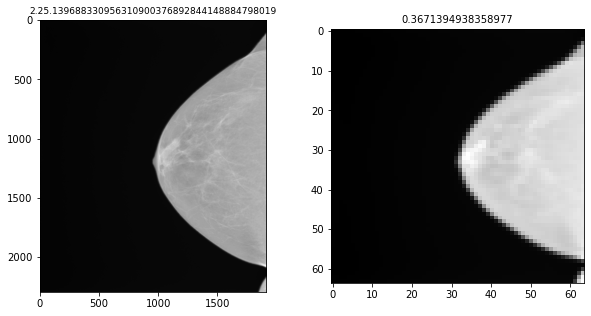

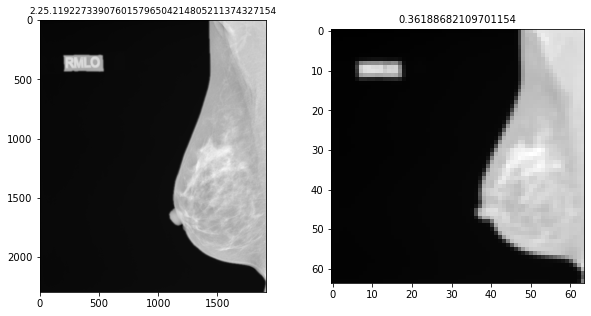

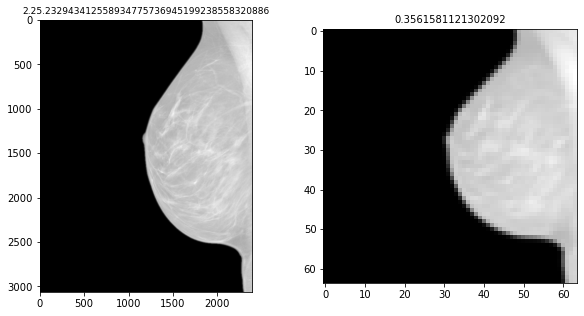

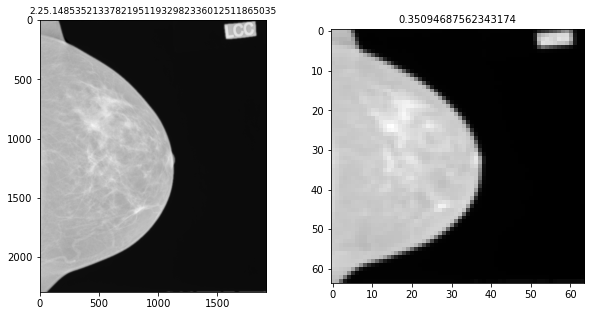

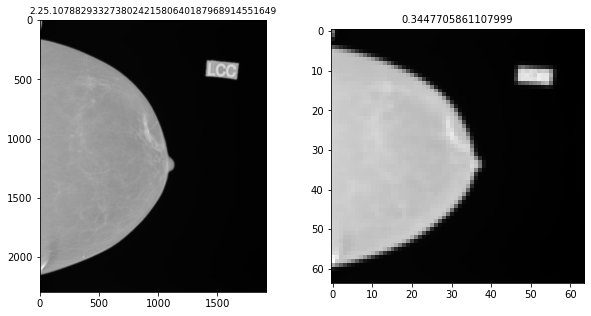

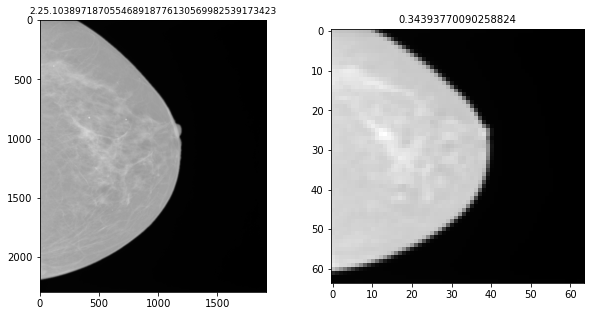

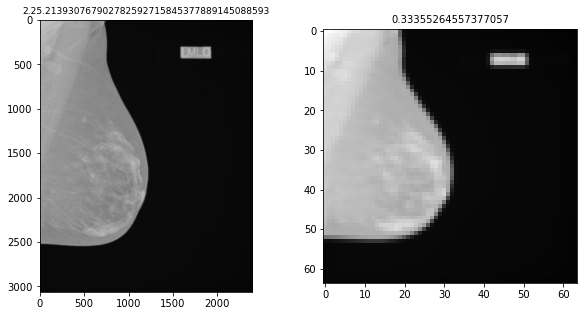

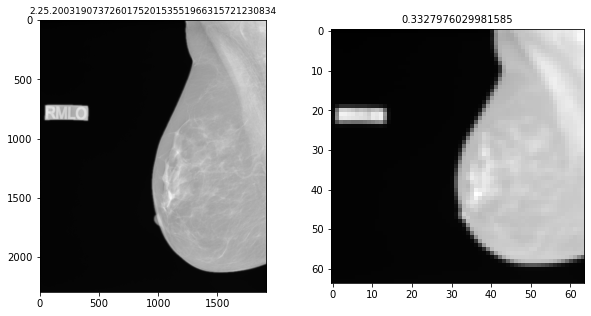

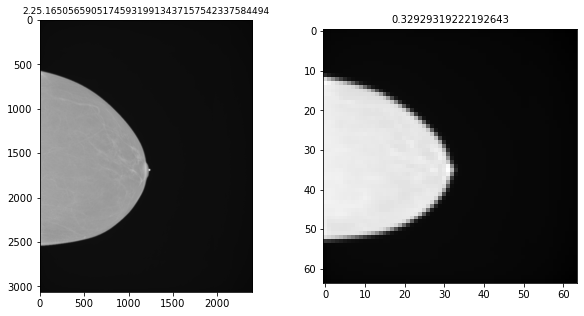

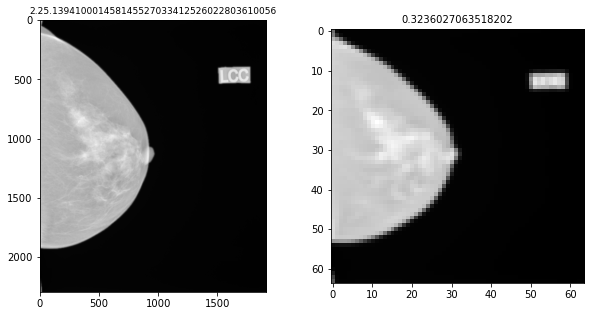

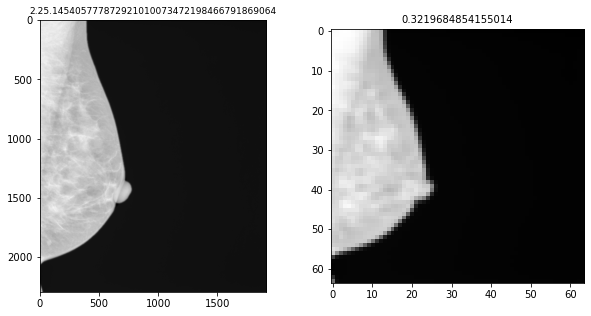

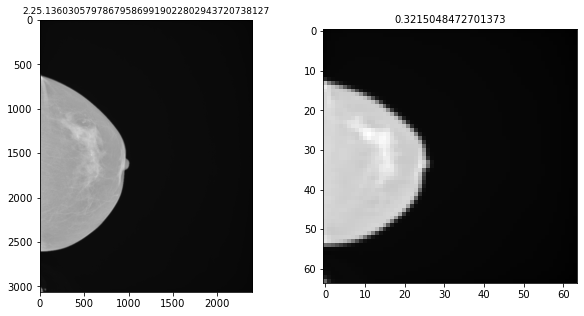

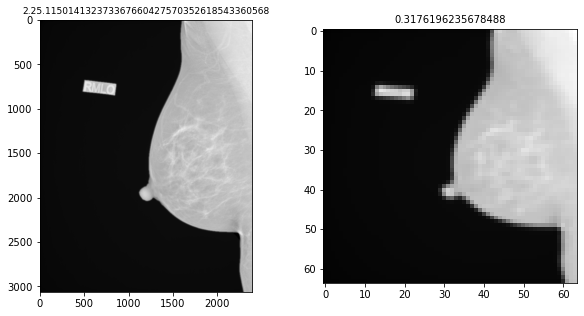

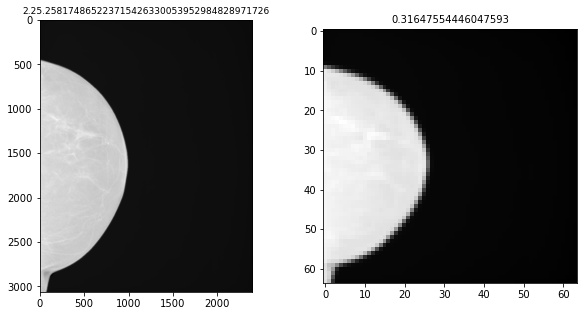

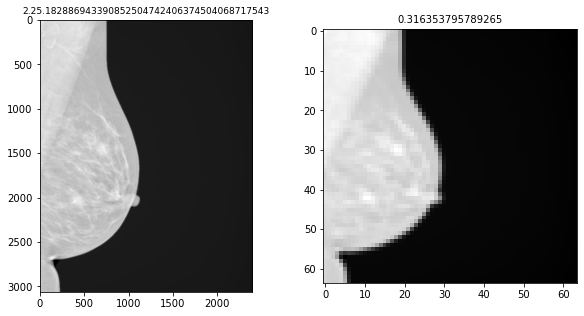

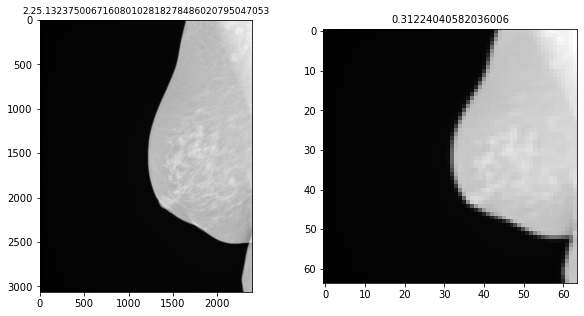

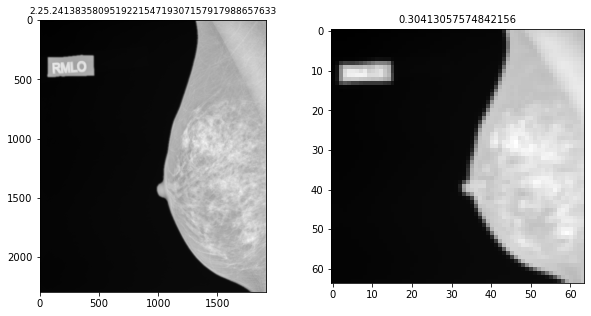

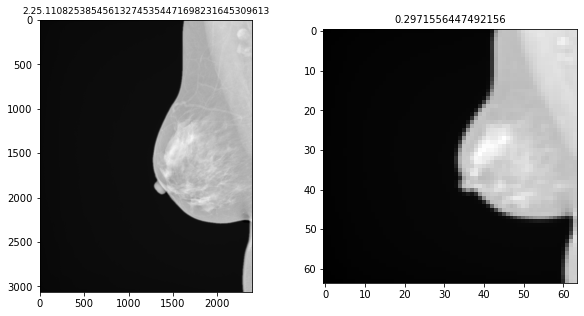

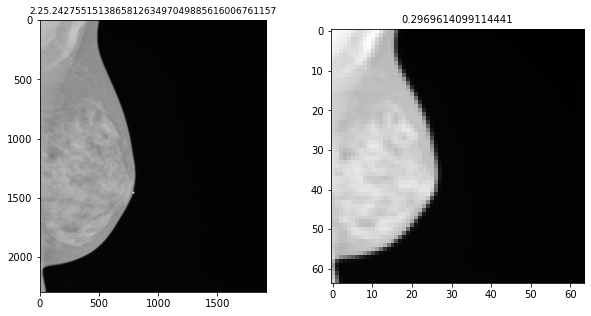

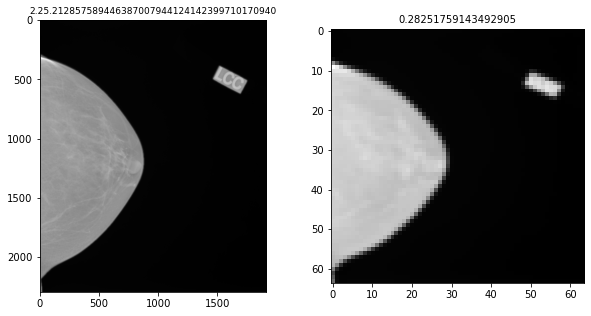

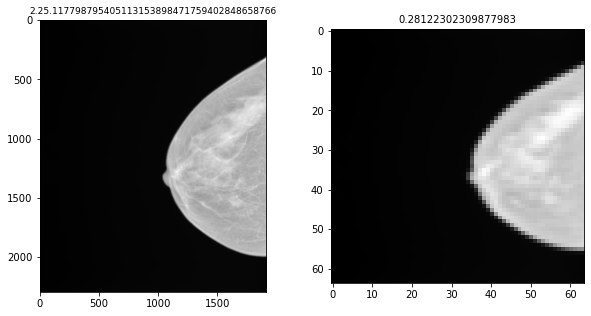

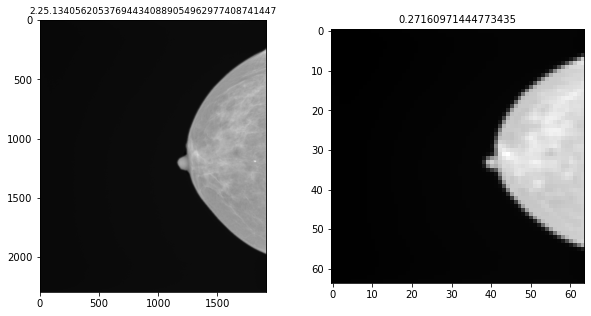

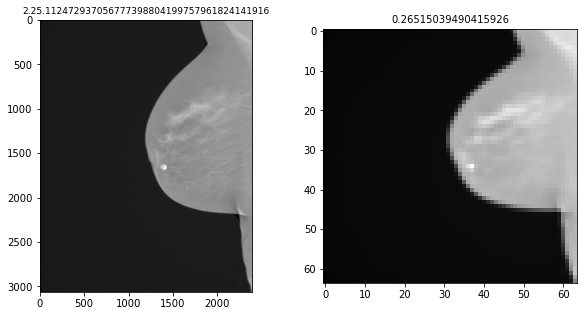

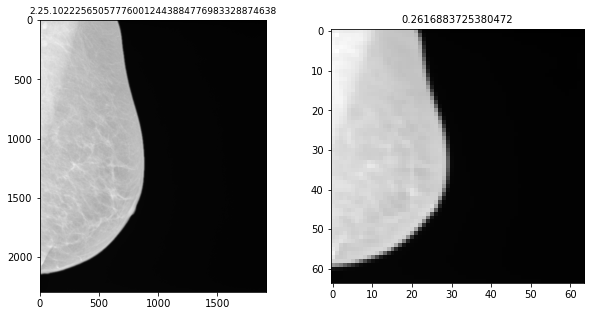

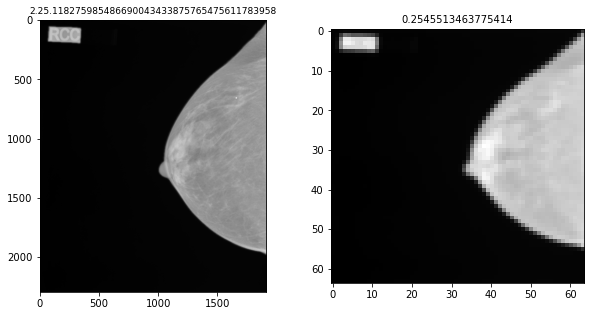

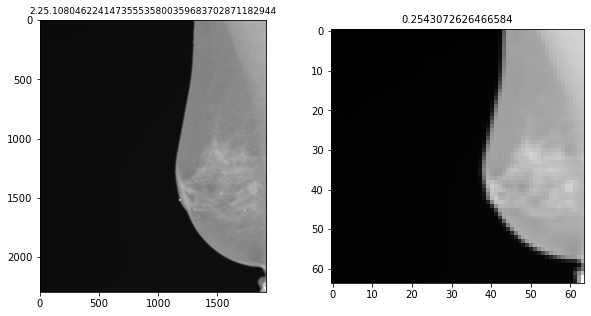

In [4]:
train_scoresX, train_labelsX = O.OutlierDetector.detect_outliers(downsampled_imgs, pyod_algorithm='INNE')
O.Features.view_image_and_features(imgs, ['downsample'], train_scores=[train_scoresX])